In [2]:
# PASO 1: IMPORTAR LIBRERÍAS Y CONFIGURAR ENTORNO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración para visualizar las columnas de las vase de datos
pd.set_option('display.max_columns', None)

FOLDER_PROCESSED = 'Data_Processed/' # Carpeta donde se guardan los documentos procesados

#Verificar los archivos dentro de la carpeta Processed
archivos_processed = [f for f in os.listdir(FOLDER_PROCESSED) if f.endswith('.csv')]

if len(archivos_processed) == 0:
    print("\n⚠️  ¡Atención! No encontré ningún archivo .csv.")
else:
    print(f"\n🚀 Listo para procesar {len(archivos_processed)} archivo(s):")
    for a in archivos_processed:
        print(f"   - {a}")


🚀 Listo para procesar 7 archivo(s):
   - Base_Datos_1_Sex_Age_Manhattan.csv
   - Base_Datos_2_Hispanic_Origin_Manhattan.csv
   - Base_Datos_3_Household_Type_Manhattan.csv
   - Base_Datos_4_Employment_Status_Manhattan.csv
   - Base_Datos_5_Income_Benefits_Manhattan.csv
   - Base_Datos_6_Housing_Occupancy_Manhattan.csv
   - Base_Datos_7_Gross_Rent_Manhattan.csv


,Zona_Nombre,Zona_Codigo,Total Poblacion,Total Male,Total Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,35 to 39 years,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over,Media de Edad
0,Chelsea-Hudson Yards,MN0401,61878,31602,30276,1748,1574,1495,1917,3316,8076,8922,4597,4108,4002,3788,4934,3972,2613,2841,1821,1212,942,39.2
1,East Harlem (North),MN1102,63526,29728,33798,3484,3590,4139,3124,4180,5610,5991,5041,4443,3807,4329,3958,3102,2374,2091,1553,1065,1645,36.6
2,East Harlem (South),MN1101,58607,24994,33613,3289,2425,3203,3078,4026,5032,5285,5319,2967,3260,3326,3463,3557,3956,2270,1942,1033,1176,37.8
3,East Midtown-Turtle Bay,MN0604,41969,19314,22655,1702,1077,1058,787,1636,4487,4259,3529,2231,1705,2740,2051,2912,2293,2883,2669,1849,2101,45.6
4,East Village,MN0303,68412,33605,34807,1968,1260,1559,4769,7706,8873,10285,4126,3310,2951,3229,4713,3471,3209,2748,1526,1322,1387,33.9
5,Financial District-Battery Park City,MN0101,48608,23249,25359,2118,1790,1682,2665,3630,7480,5781,4836,4473,3419,2592,2265,1869,1397,723,451,572,865,34.3
6,Gramercy,MN0602,26523,12304,14219,1090,506,969,1824,3007,3085,2683,1911,1761,1081,1854,1165,1572,1072,1249,555,564,575,35.2
7,Greenwich Village,MN0202,31517,15451,16066,869,726,586,3485,2816,3738,3207,2188,2214,1701,1614,1503,1271,1718,1370,1150,858,503,35.7
8,Hamilton Heights-Sugar Hill,MN0903,52530,25998,26532,2077,2755,1824,1968,2224,5591,6336,5841,3819,2979,2923,3005,3935,2809,1592,1088,1096,668,38.0
9,Harlem (North),MN1002,86090,40872,45218,5386,3864,5044,4459,4985,7976,7394,6361,6018,6273,5870,6260,5234,3789,2698,1583,1543,1353,38.1



📊 Dimensiones actuales: 31 filas y 24 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 0
Total de registros duplicados: 0

Tipos de datos:
Zona_Nombre           object
Zona_Codigo           object
Total Poblacion        int64
Total Male             int64
Total Female           int64
Under 5 years          int64
5 to 9 years           int64
10 to 14 years         int64
15 to 19 years         int64
20 to 24 years         int64
25 to 29 years         int64
30 to 34 years         int64
35 to 39 years         int64
40 to 44 years         int64
45 to 49 years         int64
50 to 54 years         int64
55 to 59 years         int64
60 to 64 years         int64
65 to 69 years         int64
70 to 74 years         int64
75 to 79 years         int64
80 to 84 years         int64
85 years and over      int64
Media de Edad        float64
dtype: object
----------------------------------------------------------------------
✅El dataset

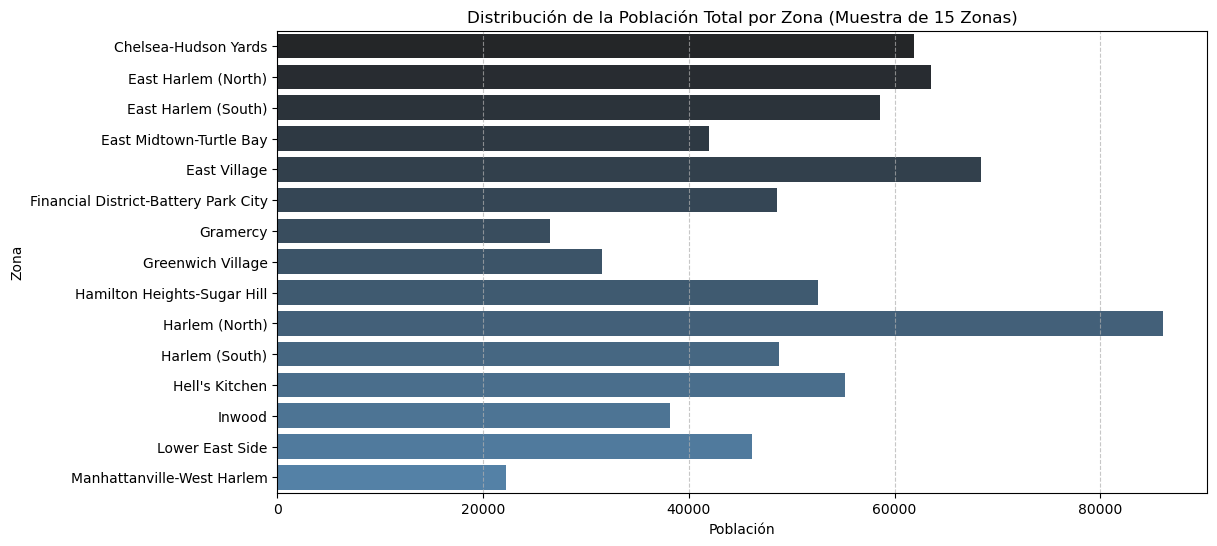

----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\03_Censo_Age_Sex_Manhattan_Limpio.csv


In [105]:
# PASO 2: LIMPIEZA Y ANÁLISIS DE EDAD Y SEXO (Sex_Age_Manhattan)

# 1. Carga del archivo
df_age_sex = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_1_Sex_Age_Manhattan.csv'))

# 2. Visualización del dataset
display(df_age_sex.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_age_sex.shape[0]} filas y {df_age_sex.shape[1]} columnas.") #dimensiones del dataset

print("-" * 70)

# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_age_sex.isnull().sum().sum()}")
    
# 3.2. Verificación de duplicados basados en zona o codigo
dup_age = df_age_sex['Zona_Codigo'].duplicated().sum()
print(f"Total de registros duplicados: {dup_age}")
    
# 3.3. Inspección de tipos de datos
print("\nTipos de datos:")
print(df_age_sex.dtypes.head(24))

print("-" * 70)
print("✅El dataset no necesita limpieza ni transformación de datos")
print("-" * 70)

# 4. Visualización de datos
plt.figure(figsize=(12, 6))

#Seleccionadas solo 15 zonas
sns.barplot(data=df_age_sex.head(15), x='Total Poblacion', y='Zona_Nombre', hue='Zona_Nombre', palette='dark:steelblue',legend=False)
plt.title('Distribución de la Población Total por Zona (Muestra de 15 Zonas)')
plt.xlabel('Población')
plt.ylabel('Zona')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_2 = '03_Censo_Age_Sex_Manhattan_Limpio.csv'
ruta_final_2 = os.path.join(carpeta_limpia, nombre_salida_2)

try:
    # Guardamos el archivo procesado
    df_age_sex.to_csv(ruta_final_2, index=False, encoding='utf-8-sig')
    
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_2}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")


,Zona_Nombre,Zona_Codigo,Grupo,Subgrupo,Poblacion
0,Chelsea-Hudson Yards,MN0401,Hispanic or Latino,Mexican,881
1,Chelsea-Hudson Yards,MN0401,Hispanic or Latino,Puerto Rican,3474
2,Chelsea-Hudson Yards,MN0401,Hispanic or Latino,Cuban,214
3,Chelsea-Hudson Yards,MN0401,Hispanic or Latino,Dominican (Dominican Republic),1435
4,Chelsea-Hudson Yards,MN0401,Central American,Costa Rican,16
5,Chelsea-Hudson Yards,MN0401,Central American,Guatemalan,62
6,Chelsea-Hudson Yards,MN0401,Central American,Honduran,38
7,Chelsea-Hudson Yards,MN0401,Central American,Nicaraguan,23
8,Chelsea-Hudson Yards,MN0401,Central American,Panamanian,95
9,Chelsea-Hudson Yards,MN0401,Central American,Salvadoran,311



📊 Dimensiones actuales: 744 filas y 5 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 0

Tipos de datos:
Zona_Nombre    object
Zona_Codigo    object
Grupo          object
Subgrupo       object
Poblacion       int64
dtype: object
----------------------------------------------------------------------
✅El dataset no necesita limpieza ni transformación de datos
----------------------------------------------------------------------


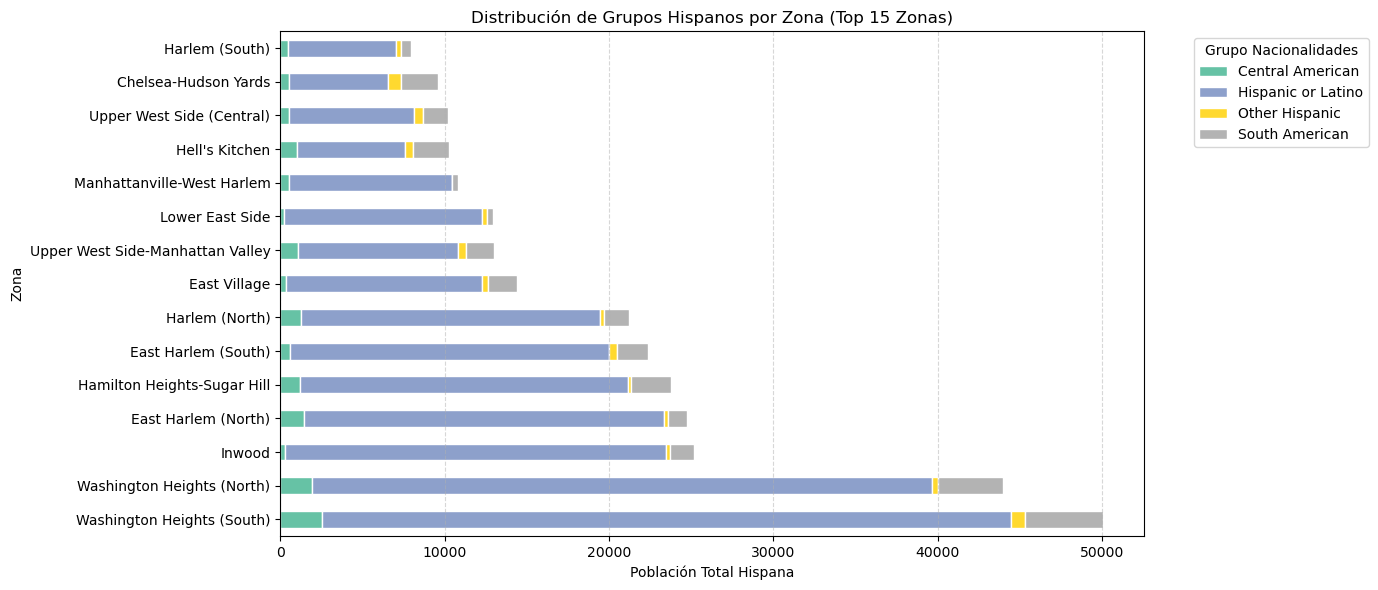

NameError: name 'carpeta_limpia' is not defined

In [4]:
# PASO 3: LIMPIEZA Y ANÁLISIS DE ORIGEN HISPANO (Hispanic_Origin_Manhattan)

# 1. Carga del archivo
df_hispanic = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_2_Hispanic_Origin_Manhattan.csv'))

# 2. Visualización del dataset
display(df_hispanic.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_hispanic.shape[0]} filas y {df_hispanic.shape[1]} columnas.") # dimensiones del dataset

print("-" * 70)

# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_hispanic.isnull().sum().sum()}")
       
# 3.2. Inspección de tipos de datos
print("\nTipos de datos:")
print(df_hispanic.dtypes.head(5))

print("-" * 70)
print("✅El dataset no necesita limpieza ni transformación de datos")
print("-" * 70)

# 4. Visualización de datos
df_pivot = df_hispanic.groupby(['Zona_Nombre', 'Grupo'])['Poblacion'].sum().unstack().fillna(0) # Agrupar por los nombres de las zonas

# 4.1. Calculo del total por zona y seleccionar solo 15 zonas
df_pivot['Total'] = df_pivot.sum(axis=1)
df_plot = df_pivot.sort_values('Total', ascending=False).head(15).drop(columns='Total') #Seleccionan el top 15 zonas 

# 4.2. Gráfico de barras apiladas
df_plot.plot(kind='barh', stacked=True, figsize=(14, 6), colormap='Set2', edgecolor='white', linewidth=1)

plt.title('Distribución de Grupos Hispanos por Zona (Top 15 Zonas)')
plt.xlabel('Población Total Hispana')
plt.ylabel('Zona')
plt.legend(title='Grupo Nacionalidades', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_3 = '04_Censo_Hispanic_Origin_Manhattan_Limpio.csv'
ruta_final_3 = os.path.join(carpeta_limpia, nombre_salida_3)

try:
    # Guardamos el archivo procesado
    df_hispanic.to_csv(ruta_final_3, index=False, encoding='utf-8-sig')
    
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_3}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")



,Zona_Nombre,Zona_Codigo,Family households (families),Married-couple family,"Male householder, no spouse present, family","Female householder, no spouse present, family",Nonfamily households,Households with one or more people under 18 years,Households with one or more people 65 years and over,Average household size,Average family size
0,Chelsea-Hudson Yards,MN0401,10741,7893,640,2208,25022,3657,7444,1.67,2.67
1,East Harlem (North),MN1102,12542,4660,1106,6776,15339,7308,7379,2.19,3.31
2,East Harlem (South),MN1101,12693,5073,1622,5998,13181,5508,8087,2.14,3.08
3,East Midtown-Turtle Bay,MN0604,9390,8209,249,932,13854,2773,8291,1.78,2.57
4,East Village,MN0303,9579,5407,969,3203,24112,3528,8141,1.83,2.80
5,Financial District-Battery Park City,MN0101,9123,7593,478,1052,14542,3970,3061,1.99,2.83
6,Gramercy,MN0602,4230,3377,348,505,9568,1879,3218,1.71,2.68
7,Greenwich Village,MN0202,5159,4462,312,385,10362,1798,4382,1.74,2.65
8,Hamilton Heights-Sugar Hill,MN0903,9673,4808,943,3922,9895,4240,5647,2.62,3.44
9,Harlem (North),MN1002,17439,6377,2004,9058,19601,8940,9194,2.26,3.30



📊 Dimensiones actuales: 31 filas y 11 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 0
Total de registros duplicados: 0

Tipos de datos:
Zona_Nombre                                              object
Zona_Codigo                                              object
Family households (families)                              int64
Married-couple family                                     int64
Male householder, no spouse present, family               int64
Female householder, no spouse present, family             int64
Nonfamily households                                      int64
Households with one or more people under 18 years         int64
Households with one or more people 65 years and over      int64
Average household size                                  float64
Average family size                                     float64
dtype: object
----------------------------------------------------------------------
✅El

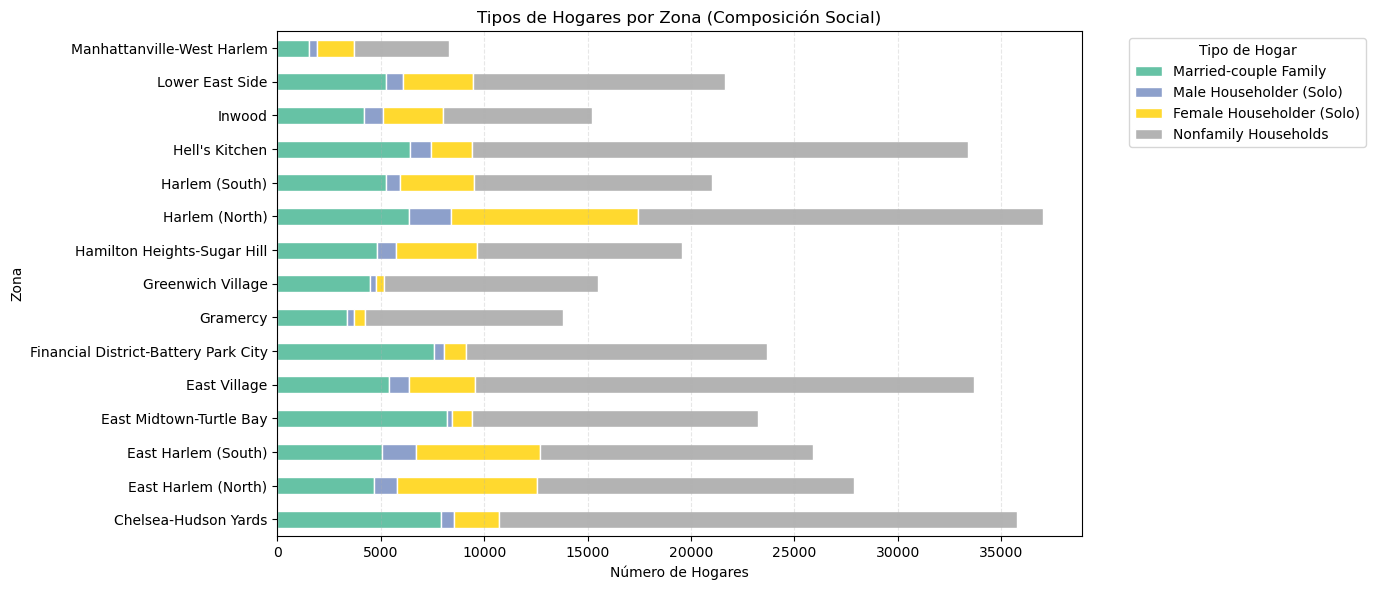

----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\05_Censo_Household_Type_Manhattan_Limpio.csv


In [11]:
# PASO 4: LIMPIEZA Y ANÁLISIS DE TIPOS DE HOGAR (Household_Type_Manhattan)

# 1. Carga del archivo
df_household = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_3_Household_Type_Manhattan.csv'))

# 2. Visualización del dataset
display(df_household.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_household.shape[0]} filas y {df_household.shape[1]} columnas.") 

print("-" * 70)

# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_household.isnull().sum().sum()}")
    
# 3.2. Verificación de duplicados basados en zona o codigo
dup_house = df_household['Zona_Codigo'].duplicated().sum()
print(f"Total de registros duplicados: {dup_house}")
    
# 3.3. Inspección de tipos de datos
print("\nTipos de datos:")
print(df_household.dtypes.head(11))

print("-" * 70)
print("✅El dataset no necesita limpieza ni transformación de datos")
print("-" * 70)

# 4. Visualización de datos: Gráfico de Barras Apiladas (Composición del Hogar)

rename_columns = {
    'Married-couple family': 'Married-couple Family',
    'Male householder, no spouse present, family': 'Male Householder (Solo)',
    'Female householder, no spouse present, family': 'Female Householder (Solo)',
    'Nonfamily households': 'Nonfamily Households'
}

# Seleccionamos las columnas con los nombres cambiados
columnas_grafico = list(rename_columns.keys())

# #Seleccionan el top 15 zona
df_plot_house = df_household.set_index('Zona_Nombre')[columnas_grafico].head(15)
df_plot_house = df_plot_house.rename(columns=rename_columns)

# Generación del gráfico de barras apiladas
df_plot_house.plot(kind='barh', stacked=True, figsize=(14, 6), colormap='Set2', edgecolor='white')

plt.title('Tipos de Hogares por Zona (Composición Social)')
plt.xlabel('Número de Hogares')
plt.ylabel('Zona')
plt.legend(title='Tipo de Hogar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_4 = '05_Censo_Household_Type_Manhattan_Limpio.csv'
ruta_final_4 = os.path.join(carpeta_limpia, nombre_salida_4)

try:
    df_household.to_csv(ruta_final_4, index=False, encoding='utf-8-sig')
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_4}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")

,Zona_Nombre,Zona_Codigo,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force
0,Chelsea-Hudson Yards,MN0401,56623,42038,42023,39668,2355,15,14585
1,East Harlem (North),MN1102,51381,29337,29321,26225,3096,16,22044
2,East Harlem (South),MN1101,49182,27188,27188,24519,2669,0,21994
3,East Midtown-Turtle Bay,MN0604,37976,26897,26896,25303,1593,1,11079
4,East Village,MN0303,63253,40237,40223,37987,2236,14,23016
5,Financial District-Battery Park City,MN0101,42669,35180,35180,33952,1228,0,7489
6,Gramercy,MN0602,23913,16854,16854,16338,516,0,7059
7,Greenwich Village,MN0202,29212,19998,19976,18825,1151,22,9214
8,Hamilton Heights-Sugar Hill,MN0903,45434,31002,30984,27908,3076,18,14432
9,Harlem (North),MN1002,70709,44020,44016,38571,5445,4,26689



📊 Dimensiones actuales: 31 filas y 9 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 0
Total de registros duplicados: 0

Tipos de datos
Zona_Nombre                     object
Zona_Codigo                     object
Population 16 years and over     int64
In labor force                   int64
Civilian labor force             int64
Employed                         int64
Unemployed                       int64
Armed Forces                     int64
Not in labor force               int64
dtype: object
----------------------------------------------------------------------
✅El dataset no necesita limpieza ni transformación de datos
----------------------------------------------------------------------


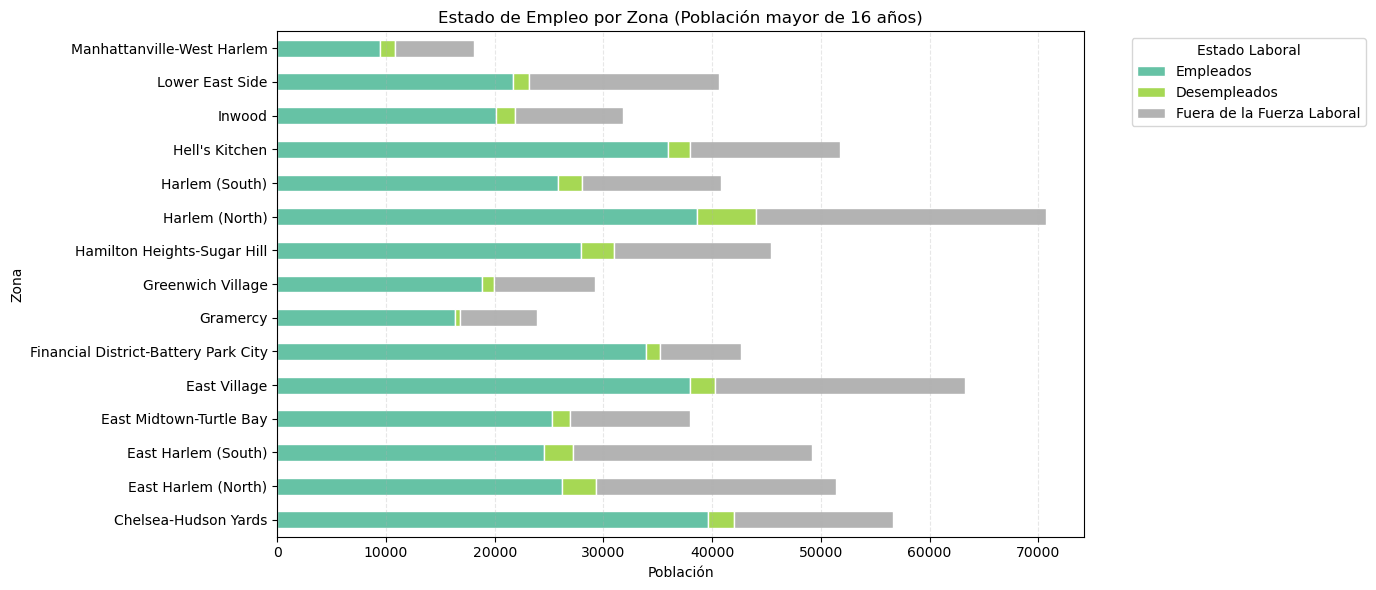

----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\06_Censo_Employment_Status_Manhattan_Limpio.csv


In [12]:
# PASO 5: EMPLEO Y FUERZA LABORAL (Employment_Status_Manhattan)

# 1. Carga del archivo
df_employment = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_4_Employment_Status_Manhattan.csv'))

# 2. Visualización del dataset
display(df_employment.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_employment.shape[0]} filas y {df_employment.shape[1]} columnas.") 

print("-" * 70)

# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_employment.isnull().sum().sum()}")
    
# 3.2. Verificación de duplicados basados en zona o codigo
dup_emp = df_employment['Zona_Codigo'].duplicated().sum()
print(f"Total de registros duplicados: {dup_emp}")
    
# 3.3. Inspección de tipos de datos
print("\nTipos de datos")
print(df_employment.dtypes.head(9))

print("-" * 70)
print("✅El dataset no necesita limpieza ni transformación de datos")
print("-" * 70)

# 4. Visualización de datos: Gráfico de Barras Apiladas (Estado de Empleo)

# Definición de nombres de variables
rename_columns = {
    'Employed': 'Empleados',
    'Unemployed': 'Desempleados',
    'Not in labor force': 'Fuera de la Fuerza Laboral'
}

# Seleccionamos las columnas para el gráfico
columnas_grafico = list(rename_columns.keys())

# Seleccionamos el top 15 zonas 
df_plot_emp = df_employment.set_index('Zona_Nombre')[columnas_grafico].head(15)
df_plot_emp = df_plot_emp.rename(columns=rename_columns)

# Generación del gráfico de barras apiladas
df_plot_emp.plot(kind='barh', stacked=True, figsize=(14, 6), colormap='Set2', edgecolor='white')

plt.title('Estado de Empleo por Zona (Población mayor de 16 años)')
plt.xlabel('Población')
plt.ylabel('Zona')
plt.legend(title='Estado Laboral', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_5 = '06_Censo_Employment_Status_Manhattan_Limpio.csv'
ruta_final_5 = os.path.join(carpeta_limpia, nombre_salida_5)

try:
    df_employment.to_csv(ruta_final_5, index=False, encoding='utf-8-sig')
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_5}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")

,Zona_Nombre,Zona_Codigo,Total households,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median household income (dollars),Mean household income (dollars)
0,Chelsea-Hudson Yards,MN0401,35763,1765,1555,1469,1110,2126,3976,2696,5300,4261,11505,126272.0,208851.0
1,East Harlem (North),MN1102,27881,4459,3524,3115,2048,2712,3926,2289,2695,1548,1565,39957.0,69405.0
2,East Harlem (South),MN1101,25874,3605,3113,2944,2032,2496,3384,1859,1969,1305,3167,42076.0,91582.0
3,East Midtown-Turtle Bay,MN0604,23244,1044,426,1103,653,1126,1330,2026,2787,2790,9959,170196.0,266919.0
4,East Village,MN0303,33691,3887,2400,2592,1296,2232,4321,2584,4080,3381,6918,76136.0,136990.0
5,Financial District-Battery Park City,MN0101,23665,494,342,334,435,937,1153,1745,3204,3256,11765,198961.0,288293.0
6,Gramercy,MN0602,13798,962,422,735,349,296,901,1055,2062,1572,5444,153720.0,219042.0
7,Greenwich Village,MN0202,15521,658,265,280,304,998,1296,995,2258,1468,6999,174062.0,293975.0
8,Hamilton Heights-Sugar Hill,MN0903,19568,1828,1190,1525,1558,1679,2608,2313,2695,2054,2118,68527.0,97799.0
9,Harlem (North),MN1002,37040,4494,3062,3768,2952,3968,5091,3878,4115,2370,3342,51386.0,85095.0



📊 Dimensiones actuales: 31 filas y 15 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 2
Total de registros duplicados: 0

Tipos de datos
Zona_Nombre                           object
Zona_Codigo                           object
Total households                       int64
Less than $10,000                      int64
$10,000 to $14,999                     int64
$15,000 to $24,999                     int64
$25,000 to $34,999                     int64
$35,000 to $49,999                     int64
$50,000 to $74,999                     int64
$75,000 to $99,999                     int64
$100,000 to $149,999                   int64
$150,000 to $199,999                   int64
$200,000 or more                       int64
Median household income (dollars)    float64
Mean household income (dollars)      float64
dtype: object
🔍 REGISTROS CON VALORES NULOS EN:


,Zona_Nombre,Zona_Codigo,Total households,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median household income (dollars),Mean household income (dollars)
21,Tribeca-Civic Center,MN0102,9667,314,262,152,143,127,676,621,702,964,5706,NaN,508980.0
22,Upper East Side-Carnegie Hill,MN0802,26603,980,338,790,715,1081,1763,1853,2987,2498,13598,NaN,365554.0


----------------------------------------------------------------------
Las columnas que contienen los nulos son: ['Median household income (dollars)']
----------------------------------------------------------------------
✅ Se ha calculado el ingreso estimado para las zonas que faltaban

Total de valores nulos detectados: 0
----------------------------------------------------------------------


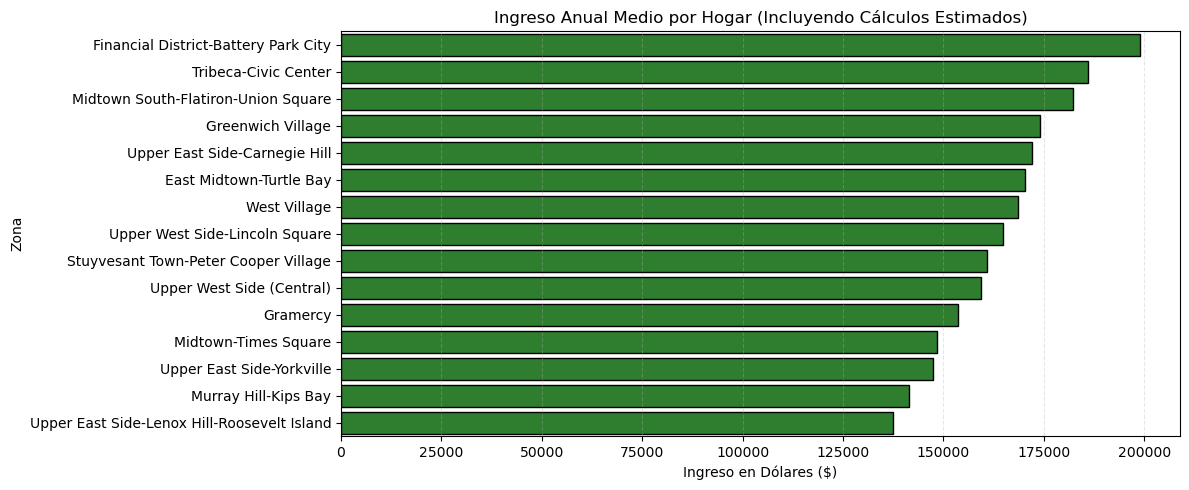

----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\07_Censo_Income_Benefits_Manhattan_Limpio.csv


In [8]:
# PASO 6: INGRESOS Y BENEFICIOS (Income_Benefit_Manhattan)

# 1. Carga del archivo
df_income = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_5_Income_Benefits_Manhattan.csv'))

# 2. Visualización del dataset
display(df_income.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_income.shape[0]} filas y {df_income.shape[1]} columnas.") 

print("-" * 70)

# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_income.isnull().sum().sum()}")

# 3.2. Verificación de duplicados basados en zona o codigo
dup_inc = df_income['Zona_Codigo'].duplicated().sum()
print(f"Total de registros duplicados: {dup_inc}")
    
# 3.3. Inspección de tipos de datos
print("\nTipos de datos")
print(df_income.dtypes.head(15))


# 4. Tratamiento de datos nulos

# 4.1 Identificar donde se encuentran los valores nulos
filas_con_nulos = df_income[df_income.isnull().any(axis=1)]

print("🔍 REGISTROS CON VALORES NULOS EN:")
display(filas_con_nulos)
    
print("-" * 70)

# 4.2 Identificar la variable que presenta valores nulos
columnas_nulas = df_income.columns[df_income.isnull().any()].tolist()
print(f"Las columnas que contienen los nulos son: {columnas_nulas}") 
print("-" * 70)

# 4.3  Definición de la columna de Median Income
col_median = [c for c in df_income.columns if 'Median household income' in c and 'dollars' in c][0]

# 4.4 Calculo para calcular la media de los valores restantes, se estiman como ingresos por variables los puntos medios de cada rango
dict_rangos = {
    'Less than $10,000': 5000,
    '$10,000 to $14,999': 12500,
    '$15,000 to $24,999': 20000,
    '$25,000 to $34,999': 30000,
    '$35,000 to $49,999': 42500,
    '$50,000 to $74,999': 62500,
    '$75,000 to $99,999': 87500,
    '$100,000 to $149,999': 125000,
    '$150,000 to $199,999': 175000,
    '$200,000 or more': 250000 
}

# 4.5 Identificamos las filas donde el Median Income es nulo
nulos_mask = df_income[col_median].isnull()

# 4.6 Función para calcular la media ponderada
def calcular_media_ponderada(row):
    suma_ingresos = 0
    total_hogares = 0
    for col_rango, punto_medio in dict_rangos.items():
        valor = str(row[col_rango]).replace(',', '')
        cantidad = pd.to_numeric(valor, errors='coerce') or 0
        suma_ingresos += (cantidad * punto_medio)
        total_hogares += cantidad
    
    return suma_ingresos / total_hogares if total_hogares > 0 else np.nan

# 4.7 Aplicamos el cálculo SOLO a las filas que tienen el M6dian Income nulo
df_income.loc[nulos_mask, col_median] = df_income[nulos_mask].apply(calcular_media_ponderada, axis=1)

print(f"✅ Se ha calculado el ingreso estimado para las zonas que faltaban")
print(f"\nTotal de valores nulos detectados: {df_income.isnull().sum().sum()}") #Verificación de valores nulos
print("-" * 70)

# 5. Visualización de datos
df_plot_inc = df_income.sort_values(by=col_median, ascending=False).head(15)

plt.figure(figsize=(12, 5))
sns.barplot(data=df_plot_inc, x=col_median, y='Zona_Nombre', color='forestgreen', edgecolor='black')

plt.title('Ingreso Anual Medio por Hogar (Incluyendo Cálculos Estimados)')
plt.xlabel('Ingreso en Dólares ($)')
plt.ylabel('Zona')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6 Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_6= '07_Censo_Income_Benefits_Manhattan_Limpio.csv'
ruta_final_6 = os.path.join(carpeta_limpia, nombre_salida_6)

try:
    df_income.to_csv(ruta_final_6, index=False, encoding='utf-8-sig')
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_6}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")


,Zona_Nombre,Zona_Codigo,Total housing units,Occupied housing units,Vacant housing units,Homeowner vacancy rate,Rental vacancy rate
0,Chelsea-Hudson Yards,MN0401,42625,35763,6862,3.6,6.3
1,East Harlem (North),MN1102,30668,27881,2787,4.9,5.1
2,East Harlem (South),MN1101,28997,25874,3123,2.4,3.8
3,East Midtown-Turtle Bay,MN0604,31825,23244,8581,8.1,7.6
4,East Village,MN0303,37020,33691,3329,0.7,3.7
5,Financial District-Battery Park City,MN0101,28478,23665,4813,4.6,2.1
6,Gramercy,MN0602,17512,13798,3714,7.5,2.6
7,Greenwich Village,MN0202,19745,15521,4224,4.9,4.1
8,Hamilton Heights-Sugar Hill,MN0903,21456,19568,1888,1.2,3.0
9,Harlem (North),MN1002,40681,37040,3641,3.8,3.9



📊 Dimensiones actuales: 31 filas y 7 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 3
Total de registros duplicados: 0

Tipos de datos
Zona_Nombre                object
Zona_Codigo                object
Total housing units         int64
Occupied housing units      int64
Vacant housing units        int64
Homeowner vacancy rate    float64
Rental vacancy rate       float64
dtype: object
🔍 REGISTROS CON VALORES NULOS EN:


,Zona_Nombre,Zona_Codigo,Total housing units,Occupied housing units,Vacant housing units,Homeowner vacancy rate,Rental vacancy rate
12,Inwood,MN1203,16309,15208,1101,NaN,3.3
14,Manhattanville-West Harlem,MN0902,9138,8311,827,NaN,4.9
20,Stuyvesant Town-Peter Cooper Village,MN0601,11561,10690,871,NaN,2.6


----------------------------------------------------------------------
Las columnas que contienen los nulos son: ['Homeowner vacancy rate']
----------------------------------------------------------------------
✅ Se han limpiado los nulos de Homeowner vacancy rate.
📊 Nulos actuales en el archivo: 0
----------------------------------------------------------------------


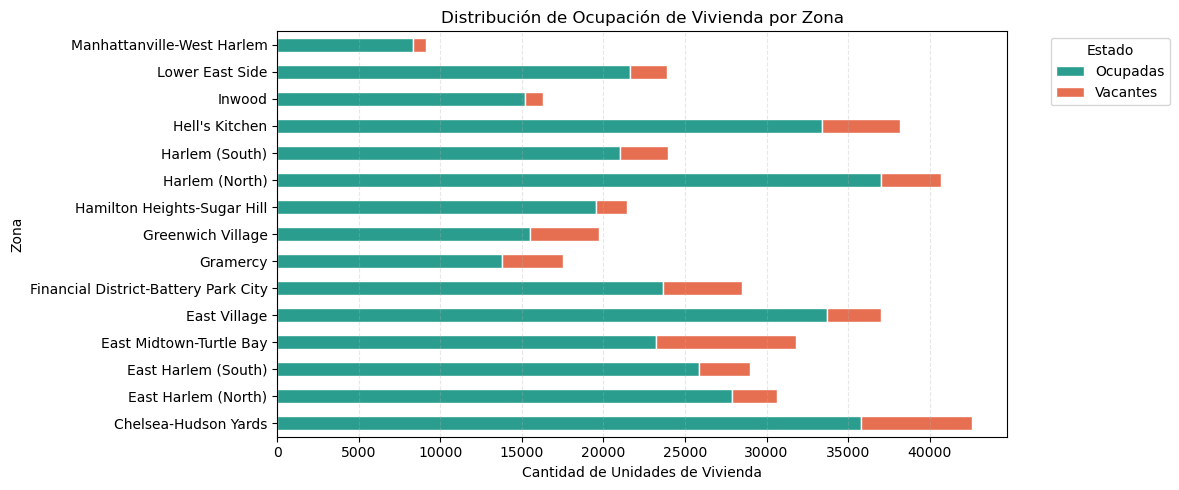

----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\08_Censo_Housing_Occupancy_Manhattan_Limpio.csv


In [6]:
# PASO 7: OCUPACIÓN DE VIVIENDA (Housing_Occupancy_Manhattan)

# 1. Carga del archivo
df_occupancy = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_6_Housing_Occupancy_Manhattan.csv'))

# 2. Visualización del dataset
display(df_occupancy.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_occupancy.shape[0]} filas y {df_occupancy.shape[1]} columnas.") 

print("-" * 70)


# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_occupancy.isnull().sum().sum()}")
    
# 3.2. Verificación de duplicados basados en zona o codigo
dup_occ = df_occupancy['Zona_Codigo'].duplicated().sum()
print(f"Total de registros duplicados: {dup_occ}")
    
# 3.3. Inspección de tipos de datos
print("\nTipos de datos")
print(df_occupancy.dtypes.head(7))


# 4. Tratamiento de datos nulos
# 4.1 Identificar donde se encuentran los valores nulos
filas_con_nulos = df_occupancy[df_occupancy.isnull().any(axis=1)]

print("🔍 REGISTROS CON VALORES NULOS EN:")
display(filas_con_nulos)
    
print("-" * 70)

# 4.2 Identificar la variable que presenta valores nulos
columnas_nulas = df_occupancy.columns[df_occupancy.isnull().any()].tolist()
print(f"Las columnas que contienen los nulos son: {columnas_nulas}") 
print("-" * 70)

# 4.3 Definición de las variables
col_occupied = 'Occupied housing units'
col_vacant = 'Vacant housing units'
col_rate_rent = 'Rental vacancy rate'    
col_rate_home = 'Homeowner vacancy rate' 

# 4.4 Calculo de la tasa de valores faltantes
v_occupied = pd.to_numeric(df_occupancy[col_occupied].astype(str).str.replace(',', ''), errors='coerce')
v_vacant = pd.to_numeric(df_occupancy[col_vacant].astype(str).str.replace(',', ''), errors='coerce')
calculo_tasa = (v_vacant / (v_occupied + v_vacant)) * 100

# 4.5 Sustitucion del valor calculoado
df_occupancy[col_rate_home] = df_occupancy[col_rate_home].fillna(calculo_tasa)

print(f"✅ Se han limpiado los nulos de Homeowner vacancy rate.")
print(f"📊 Nulos actuales en el archivo: {df_occupancy.isnull().sum().sum()}")
print("-" * 70)

# 4. Visualización: Gráfico de Barras apiladas (Estado de Ocupación)
df_plot_occ = df_occupancy.set_index('Zona_Nombre')[[col_occupied, col_vacant]].head(15)

df_plot_occ = df_plot_occ.rename(columns={col_occupied: 'Ocupadas', col_vacant: 'Vacantes'})

df_plot_occ.plot(kind='barh', stacked=True, figsize=(12, 5), color=['#2A9D8F', '#E76F51'], edgecolor='white')

plt.title('Distribución de Ocupación de Vivienda por Zona')
plt.xlabel('Cantidad de Unidades de Vivienda')
plt.ylabel('Zona')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_7 = '08_Censo_Housing_Occupancy_Manhattan_Limpio.csv'
ruta_final_7 = os.path.join(carpeta_limpia, nombre_salida_7)

try:
    df_occupancy.to_csv(ruta_final_7, index=False, encoding='utf-8-sig')
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_7}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")


In [ ]:
# 5. Visualización: Gráfico de Barras apiladas (Estado de Ocupación)
df_plot_occ = df_occupancy.set_index('Zona_Nombre')[[col_occupied, col_vacant]].head(15)

df_plot_occ = df_plot_occ.rename(columns={col_occupied: 'Ocupadas', col_vacant: 'Vacantes'})

df_plot_occ.plot(kind='barh', stacked=True, figsize=(12, 7), color=['#2A9D8F', '#E76F51'], edgecolor='white')

plt.title('Distribución de Ocupación de Vivienda por Zona')
plt.xlabel('Cantidad de Unidades de Vivienda')
plt.ylabel('Zona')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Exportación de dataset limpio
carpeta_limpia = 'Datos_Limpios'
nombre_salida_7 = '08_Censo_Housing_Occupancy_Manhattan_Limpio.csv'
ruta_final_7 = os.path.join(carpeta_limpia, nombre_salida_7)

try:
    df_occupancy.to_csv(ruta_final_7, index=False, encoding='utf-8-sig')
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_7}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")

,Zona_Nombre,Zona_Codigo,Occupied units paying rent,Less than $500,$500 to $999,"$1,500 to $1,999","$2,000 to $2,499","$2,500 to $2,999","$3,000 or more",No rent paid
0,Chelsea-Hudson Yards,MN0401,26276,1610,2794,1522,2148,2332,12638,407
1,East Harlem (North),MN1102,24899,4903,4987,3164,3004,1924,1387,479
2,East Harlem (South),MN1101,23726,5068,4749,2809,2706,971,3325,226
3,East Midtown-Turtle Bay,MN0604,12435,137,394,927,1664,2044,6425,497
4,East Village,MN0303,28776,4237,4807,2254,2965,2686,8092,381
5,Financial District-Battery Park City,MN0101,17675,179,529,378,567,1376,14474,82
6,Gramercy,MN0602,8096,76,535,848,889,661,4059,300
7,Greenwich Village,MN0202,9297,129,439,725,1086,1375,4493,179
8,Hamilton Heights-Sugar Hill,MN0903,16254,830,2107,3154,3030,1616,2108,457
9,Harlem (North),MN1002,32093,4490,5490,5441,3583,1917,2386,277



📊 Dimensiones actuales: 31 filas y 10 columnas.
----------------------------------------------------------------------

Total de valores nulos detectados: 0
Total de registros duplicados: 0

Tipos de datos
Zona_Nombre                   object
Zona_Codigo                   object
Occupied units paying rent     int64
Less than $500                 int64
$500 to $999                   int64
$1,500 to $1,999               int64
$2,000 to $2,499               int64
$2,500 to $2,999               int64
$3,000 or more                 int64
No rent paid                   int64
dtype: object
----------------------------------------------------------------------
✅El dataset no necesita limpieza de datos
----------------------------------------------------------------------


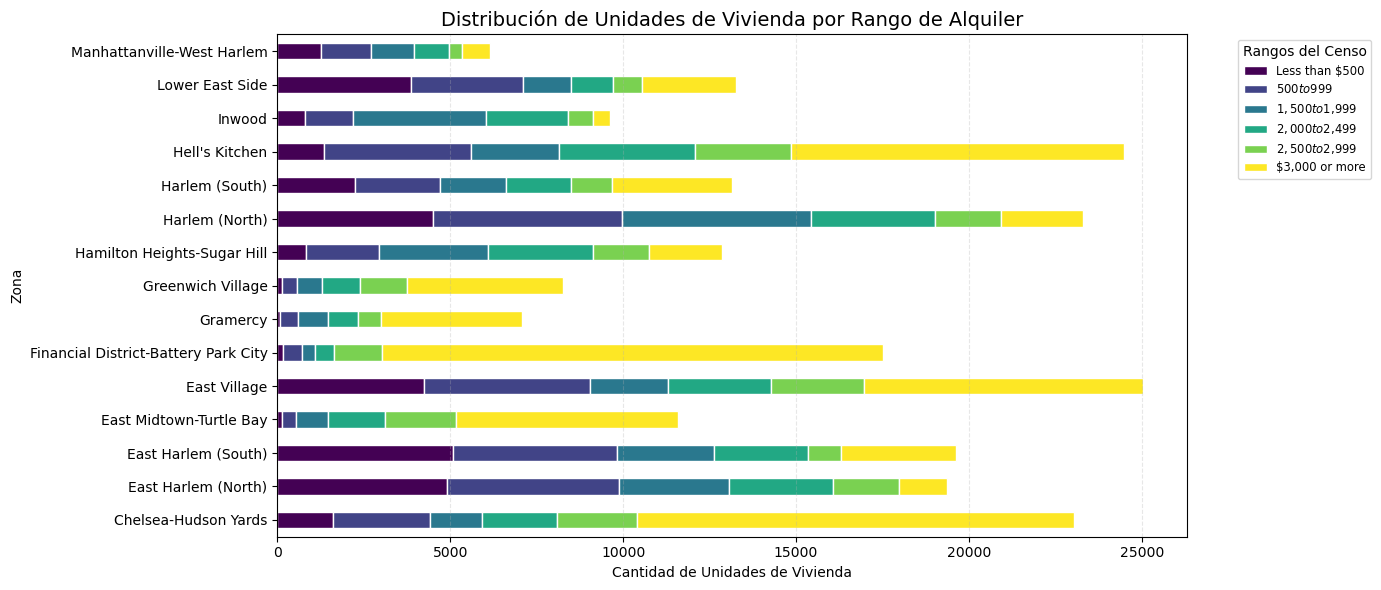

----------------------------------------------------------------------
📂 Archivo guardado en: Datos_Limpios\09_Censo_Gross_Rent_Manhattan_Limpio.csv


In [9]:
# PASO 8: ANÁLISIS DE ALQUILER (Gross_Rent_Manhattan)

# 1. Carga del archivo
df_rent = pd.read_csv(os.path.join(FOLDER_PROCESSED, 'Base_Datos_7_Gross_Rent_Manhattan.csv'))

# 2. Visualización del dataset
display(df_rent.head(10)) # 10 primeros registros

print(f"\n📊 Dimensiones actuales: {df_rent.shape[0]} filas y {df_rent.shape[1]} columnas.") 

print("-" * 70)

# 3. Analisis de calidad de los datos

# 3.1. Verificación de valores nulos o vacíos
print(f"\nTotal de valores nulos detectados: {df_rent.isnull().sum().sum()}")
    
# 3.2. Verificación de duplicados basados en zona o codigo
dup_rent = df_rent['Zona_Codigo'].duplicated().sum()
print(f"Total de registros duplicados: {dup_rent}")
    
# 3.3. Inspección de tipos de datos
print("\nTipos de datos")
print(df_rent.dtypes.head(10))

print("-" * 70)
print("✅El dataset no necesita limpieza de datos")
print("-" * 70)


# 4. Visualización: Gráfico de Barras Simple (Renta por Zona)
columnas_rangos = [
    'Less than $500', 
    '$500 to $999', 
    '$1,500 to $1,999', 
    '$2,000 to $2,499', 
    '$2,500 to $2,999', 
    '$3,000 or more'
]

columnas_reales = [c for c in columnas_rangos if c in df_rent.columns]

# Seleccionamos top 15 zonas
df_plot_dist = df_rent.set_index('Zona_Nombre')[columnas_reales].head(15)

# Generación del grafico
df_plot_dist.plot(kind='barh', stacked=True, figsize=(14, 6), colormap='viridis', edgecolor='white')

plt.title('Distribución de Unidades de Vivienda por Rango de Alquiler', fontsize=14)
plt.xlabel('Cantidad de Unidades de Vivienda')
plt.ylabel('Zona')
plt.legend(title='Rangos del Censo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Exportación de dataset limpio 
carpeta_limpia = 'Datos_Limpios'
nombre_salida_8 = '09_Censo_Gross_Rent_Manhattan_Limpio.csv'
ruta_final_8 = os.path.join(carpeta_limpia, nombre_salida_8)


try:
    df_rent.to_csv(ruta_final_8, index=False, encoding='utf-8-sig')
    print("-" * 70)
    print(f"📂 Archivo guardado en: {ruta_final_8}")
except Exception as e:
    print(f"❌ Error al exportar: {e}")
